In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### Minimizarea funcției de cost folosind OLS

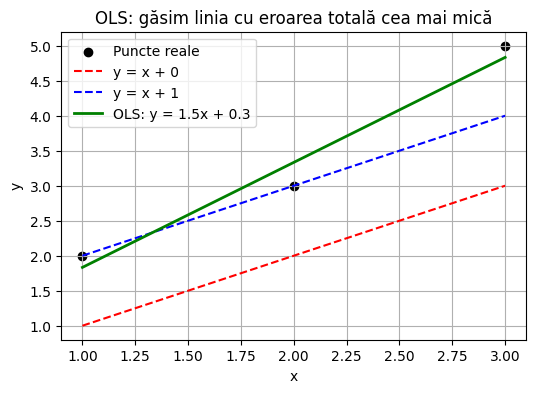

In [ ]:
# Datele noastre
x = np.array([1, 2, 3])
y = np.array([2, 3, 5])

# Calculează linia optimă (OLS)
m = np.sum((x - x.mean()) * (y - y.mean())) / np.sum((x - x.mean())**2)
n = y.mean() - m * x.mean()
y_pred_ols = m * x + n

# Alte linii de test
y_pred_1 = 1 * x + 0
y_pred_2 = 1 * x + 1

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color="black", label="Puncte reale")
plt.plot(x, y_pred_1, "--", color="red", label="y = x + 0")
plt.plot(x, y_pred_2, "--", color="blue", label="y = x + 1")
plt.plot(x, y_pred_ols, "-", color="green", linewidth=2, label=f"OLS: y = {m:.1f}x + {n:.1f}")

# Adăugăm text explicativ
plt.title("OLS: găsim linia cu eroarea totală cea mai mică")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Data Preprocessing

In [ ]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])

In [ ]:
for i, j in zip(x_train, y_train):
    print(i, j)

30 70000
50 100000
60 120000
80 150000
100 200000


In [ ]:
len(x_train), len(y_train)

(5, 5)

In [ ]:
x_train, y_train

(array([ 30,  50,  60,  80, 100]),
 array([ 70000, 100000, 120000, 150000, 200000]))

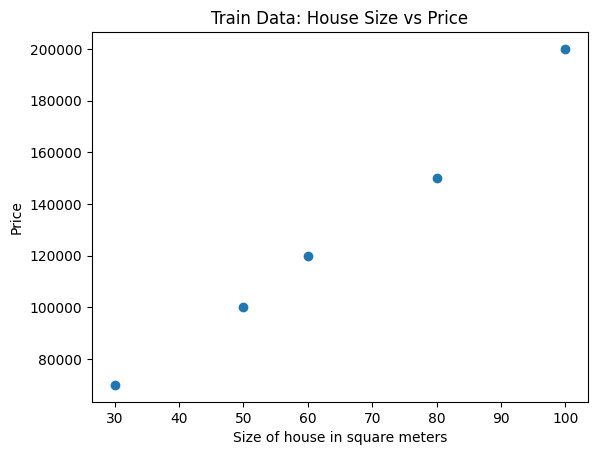

In [ ]:
plt.scatter(x_train, y_train)
plt.title("Train Data: House Size vs Price")
plt.xlabel("Size of house in square meters")
plt.ylabel("Price")
plt.show()

In [ ]:
x_train.shape

(5,)

### Train

In [ ]:
def compute_cost(x, y, m, n):
    nr = x.shape[0]
    cost = 0

    for i in range(0, nr):
        f_mn = m * x[i] + n
        cost += (f_mn - y[i])**2

    total_cost = cost / (2 * nr)
    return total_cost

In [ ]:
def compute_gradients(x, y, m, n):
    nr = x.shape[0]
    dj_dm = 0
    dj_dn = 0

    for i in range(0, nr):
        f_mn = m * x[i] + n
        dj_dm += (f_mn - y[i]) * x[i]
        dj_dn += (f_mn - y[i])

    dj_dm = dj_dm / nr
    dj_dn = dj_dn / nr

    return dj_dm, dj_dn

In [ ]:
def gradient_descent(x, y, m_in, n_in, alpha, num_inters, cost_function, gradient_function):
    m = copy.deepcopy(m_in)
    n = copy.deepcopy(n_in)

    # cost function evolution - loss
    J_history = []

    for i in range(0, num_inters):
        dj_dm, dj_dn = gradient_function(x, y, m, n)

        m = m - alpha * dj_dm
        n = n - alpha * dj_dn

        J_history.append(cost_function(x, y, m, n))

        print(f"Iteration: {i} | Cost: {J_history[i]:.4} | dj_dm: {dj_dm:.4} | dj_dn: {dj_dn:.4} | m: {m:.4} | n: {n:.4}")

    return m, n, J_history

In [ ]:
m_init = 0
n_init = 0

iterations = 20
alpha = 3.0e-4 # => 3 * 10^(-4) = 0.0003

m_final, n_final, J_history = gradient_descent(x=x_train, y=y_train, alpha=alpha, m_in=m_init, n_in=n_init, num_inters=iterations, cost_function=compute_cost, gradient_function=compute_gradients)
print(f"(m, n) found by gradient descent ({m_final:.4}, {n_final:.4})")

Iteration: 0 | Cost: 1.516e+09 | dj_dm: -9.26e+06 | dj_dn: -1.28e+05 | m: 2.778e+03 | n: 38.4
Iteration: 1 | Cost: 2.636e+08 | dj_dm: 3.743e+06 | dj_dn: 4.983e+04 | m: 1.655e+03 | n: 23.45
Iteration: 2 | Cost: 5.888e+07 | dj_dm: -1.513e+06 | dj_dn: -2.206e+04 | m: 2.109e+03 | n: 30.07
Iteration: 3 | Cost: 2.543e+07 | dj_dm: 6.118e+05 | dj_dn: 7.003e+03 | m: 1.925e+03 | n: 27.97
Iteration: 4 | Cost: 1.996e+07 | dj_dm: -2.473e+05 | dj_dn: -4.746e+03 | m: 2e+03 | n: 29.39
Iteration: 5 | Cost: 1.907e+07 | dj_dm: 1e+05 | dj_dn: 3.701 | m: 1.97e+03 | n: 29.39
Iteration: 6 | Cost: 1.892e+07 | dj_dm: -4.04e+04 | dj_dn: -1.916e+03 | m: 1.982e+03 | n: 29.97
Iteration: 7 | Cost: 1.889e+07 | dj_dm: 1.636e+04 | dj_dn: -1.14e+03 | m: 1.977e+03 | n: 30.31
Iteration: 8 | Cost: 1.889e+07 | dj_dm: -6.587e+03 | dj_dn: -1.454e+03 | m: 1.979e+03 | n: 30.74
Iteration: 9 | Cost: 1.889e+07 | dj_dm: 2.689e+03 | dj_dn: -1.327e+03 | m: 1.978e+03 | n: 31.14
Iteration: 10 | Cost: 1.889e+07 | dj_dm: -1.061e+03 | dj

### Metrics

In [ ]:
J_history

[np.float64(1516077310.0799985),
 np.float64(263575550.75001973),
 np.float64(58880942.8086731),
 np.float64(25427599.256992),
 np.float64(19959911.864977896),
 np.float64(19065870.658561178),
 np.float64(18919292.371351305),
 np.float64(18894870.658259764),
 np.float64(18890412.812352978),
 np.float64(18889217.66078383),
 np.float64(18888555.760492597),
 np.float64(18887981.043438334),
 np.float64(18887420.609509654),
 np.float64(18886862.544767972),
 np.float64(18886304.90213696),
 np.float64(18885747.36340665),
 np.float64(18885189.876569975),
 np.float64(18884632.433124974),
 np.float64(18884075.031679444),
 np.float64(18883517.672003355)]

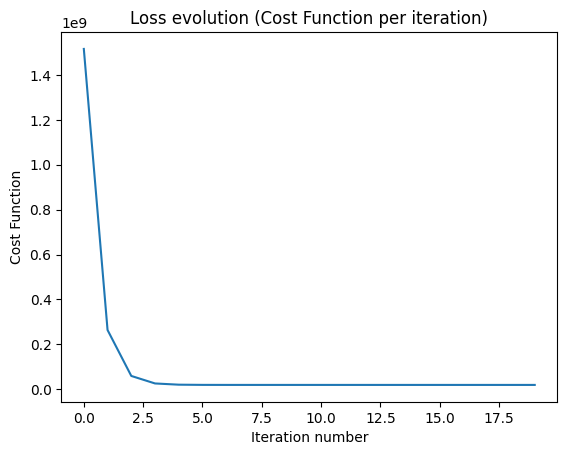

In [ ]:
plt.plot(J_history)
plt.title("Loss evolution (Cost Function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost Function")
plt.show()

In [ ]:
def r2_score(y, y_):
    num = np.sum((y - y_)**2)
    denom = np.sum((y - y.mean())**2)

    score = 1 - num / denom
    return score

In [ ]:
y_ = [m_final * i + n_final for i in x_train]

In [ ]:
y_

[np.float64(59379.87227105263),
 np.float64(98942.9642045718),
 np.float64(118724.51017133139),
 np.float64(158287.60210485058),
 np.float64(197850.69403836975)]

In [ ]:
r2_score(y_train, y_) # between 0 - 1.

np.float64(0.9808871278623448)

### Prediction

In [ ]:
x_train = np.array([30, 50, 60, 80, 100])
y_train = np.array([70000, 100000, 120000, 150000, 200000])

In [ ]:
size_of_house = 20
print(f"A house with size(m^2) {size_of_house} has a price of: {m_final * size_of_house + n_final}$")
size_of_house = 30
print(f"A house with size(m^2) {size_of_house} has a price of: {m_final * size_of_house + n_final}$")
size_of_house = 50
print(f"A house with size(m^2) {size_of_house} has a price of: {m_final * size_of_house + n_final}$")
size_of_house = 60
print(f"A house with size(m^2) {size_of_house} has a price of: {m_final * size_of_house + n_final}$")
size_of_house = 100
print(f"A house with size(m^2) {size_of_house} has a price of: {m_final * size_of_house + n_final}$")

A house with size(m^2) 20 has a price of: 39598.32630429304$
A house with size(m^2) 30 has a price of: 59379.87227105263$
A house with size(m^2) 50 has a price of: 98942.9642045718$
A house with size(m^2) 60 has a price of: 118724.51017133139$
A house with size(m^2) 100 has a price of: 197850.69403836975$


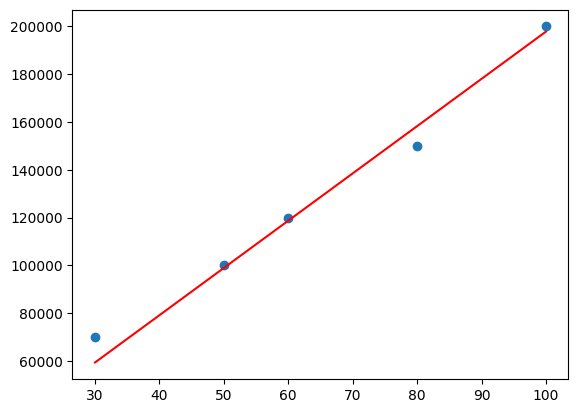

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, m_final * x_train + n_final, c='r')
plt.show()